# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,8)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:


$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$$a(x_{i}, w) = \sum_{j = 0}^{D} x_{ij}w_{j}$$
$$ \vec{y} = [y_0 ... y_m]$$
$$\vec{w} = (w_0, w_1 ... w_d)$$
$$\vec{w_0} = (0, w_1 ... w_d)$$
$$L(w) = \frac{1}{M}\sum_i (y_{i} - a(x_{i}, w))^{2} + \frac{1}{C}\sum_{j = 1}^{D}w_{j}^{2}$$
$$L(w) = \frac{1}{M}\|{\vec{y} - X\vec{w}}\|^{2} + \frac{1}{C}\|\vec{w_0}\|^{2} =$$
$$= \frac{1}{M}(\vec{y} - X\vec{w})^{T}(\vec{y} - X\vec{w}) + \frac{1}{C}\vec{w_0^{T}}\vec{w_0} =$$
$$= \frac{1}{M}(-2\vec{y}^{T}X\vec{w} + \vec{w}^{T}X^{T}X\vec{w}) + \frac{1}{C}\vec{w_0^{T}}\vec{w_0}$$
$$\nabla_{w}L(w) = \frac{1}{M}(-2X^T\vec{y} + 2X^{T}X\vec{w}) + \frac{2}{C}\vec{w_0} =$$
$$= \frac{2}{M}(X^{T}X\vec{w} - X^T\vec{y}) + \frac{2}{C}\vec{w_0}$$

$$w_{new} = w_{old} - \frac{2}{M}X^T(X\vec{w} - \vec{y}) - \frac{2}{C}\vec{w_0}$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

$$a(x_i) =  \sigma( \langle\,x_i,w\rangle )$$
$$a(X)^T =  [\sigma( \langle\,x_0,w\rangle ... \sigma\langle\,x_m,w\rangle]  )$$
$$ \vec{y} = [y_0 ... y_m]$$
$$\vec{w} = (w_0, w_1 ... w_d)$$
$$\vec{w_0} = (0, w_1 ... w_d)$$
$${\nabla_{w}}Q(w) ={-\nabla_{w}}\left(\frac{1}{M}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i)\right] + \frac{1}{C}\sum_{j = 0}^{D}w_{j}^{2}\right)=$$
$${=\nabla_{w}}\frac{1}{M}\left[\sum_i y_i\log{(1+e^{\langle\,-x_i,w\rangle}}) + (1-y_i)\log{\frac{e^{\langle\,-x_i,w\rangle}+1}{e^{\langle\,-x_i,w\rangle}}}\right]+ \frac{2}{C}\vec w_0$$
$${=\nabla_{w}}\frac{1}{M}\left[\sum_i y_i\log{e^{\langle\,-x_i,w\rangle}} - \log{(1-e^{\langle\,-x_i,w\rangle})}\right]+ \frac{2}{C}\vec{w_0}$$

$${=\nabla_{w}}\frac{1}{M}\left[\sum_i -y_i{\langle\,x_i,w\rangle} + \log\frac{1}{1+e^{(x_iw)}}\right]+ \frac{2}{C}\vec {w_0} = $$
$$=\frac{1}{M}(- \vec{y} + a(X)^T)X+ \frac{2}{C}\vec{w_0}$$ 
$$ w_{new} = w_{old} - \frac{1}{M}(a(X)^T - \vec{y})X- \frac{2}{C}\vec{w_0} $$
Где X матрица состоит из M объектов и их признаков

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

$$Q(w) = \|Xw − y\| = (Xw − y)^T(Xw − y)$$
$$\nabla_wQ(w) = \nabla_w(w^TX^TXw − w^TX^Ty − y^TXw + y^Ty) = 2X^TXw − 2X^Ty$$
Достаточным условием минимума функции является: 
1)$$grad(f) = \vec 0$$
2)Гессиан функции H(f) положительно определён.
$$H(f(\vec w)) = \nabla_w(\nabla_wQ(\vec w)) = \nabla_w(2X^TX\vec w − 2X^Ty) = 2X^TX$$
Причем, так как Х имеет полный ранг, то
$$rank(X^TX) = rank(X) = dim(\vec{w})$$
матрица $X^TX$ - это матрица грамма. Так как она имеет максимальный ранг, то она положительно определена.


Выпишем точное решение с L2 регуляризацией
$$\frac{2}{N}(X^{T}X\vec{w} - \vec{y}^{T}X) + \frac{2}{C}\vec{w} = 0$$
$$(X^{T}X\vec{w} - \vec{y}^{T}X) + \lambda\vec{w} = 0$$
$$\vec{w} = (X^{T}X+ \lambda E)^{-1}{y}^{T}X$$
Как мы видим из формулы для точного решения, L2 решает проблему плохо обусловленной матрицы X (наличие линейно зависимых признаков), путем сдвига всех собственных значений на 𝜆.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Введем обозначения $p := p(y_i = 1| x_i)$, $a := a(x_i)$
$$E(L|x_i) = -p\log a - (1 - p)\log (1 - a)$$
Функция E(a), неотрицательна и определена на отрезке [0,1], продифференцируем ее по а:
$$E^{'}(L|x_i) = p(-\frac{1}{1-a} - \frac{1}{a}) + \frac{1}{1-a} =$$
$$= \frac{-p}{(1-a)a} + \frac{1}{1-a} = 0$$
$$a = p$$
$a = p$ - точка экстремума. Покажем что она является минимумом:
$$E^{''} = p\frac{1 - 2a}{(1 - a)^2a^2} + \frac{1}{(1 - a)^2}$$
При a не равным {0,1}, получаем
$$E^{''}|_{a = p} = \frac{1 - 2p}{(1 - p)^2p} + \frac{1}{(1 - p)^2} = \frac{1 - p}{(1 - p)^2p} > 0$$
При a равным 0 или 1 E(a) равно 0

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Нет смысла штрафовать модель за большой свободный член $w_0$, т.к. он является сдвигом относительно начала координат, который будет подстраиваться под нибольшее кол-во объектов игнорируя выбросы. Так же можно заметить, что его слишком большое (по модулю) значение и так штрафуется в модели, т.к. он не учавствует в произведении с признаками объектов и от его велечины напрямую зависит величина ошибки.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [16]:
from sklearn.utils import shuffle
import numpy as np
import sklearn as sk

In [17]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        X, y = sk.utils.shuffle(X,y)

    for i in np.arange(0, len(y), batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [127]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.001, max_epoch=1,
                 model_type='lin_reg', batch_size = 1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        if(self.model_type == 'lin_reg'):
            loss = np.sum((np.dot(X_batch,self.weights) - y_batch)**2)/(len(y_batch))
        else:
            p = sigmoid(X_batch @ self.weights)
            loss = - (np.dot(y_batch, np.log(p)) +
                    np.dot(1.0 - y_batch, np.log(1.0 - p))) / len(y_batch)
        loss += np.sum(self.weights[1:] ** 2) / self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        Xw = self.weights @ X_batch.T
        
        if(self.model_type == 'log_reg'):
            Xw = sigmoid(Xw)
            
        loss_grad = 2*(((Xw - y_batch) @ X_batch)/len(y_batch)
                       + 2/self.C*self.weights_0 * self.weights)
        
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
            
        X = np.hstack((np.ones(len(X)).reshape(-1,1),X))
        self.weights = np.random.rand(len(X[0]))
        self.weights_0 = np.ones(len(X[0]))
        self.weights_0[0] = 0
        
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X, threshold):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        
        new_X = np.hstack((np.ones(len(X)).reshape(-1,1),X))
        predict = new_X @ self.weights
        
        if self.model_type == 'log_reg':
            predict = predict > threshold
        return 
        
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [128]:
def plot_decision_boundary(w, X):

    print(*w)

    x1min, x1max = X[:,0].min(), X[:,0].max()
    x2min, x2max = X[:,1].min(), X[:,1].max()

    x1 = np.linspace(x1min, x1max)
    x2 = -(w[1]*x1 + w[0])/w[2]
    mask = np.logical_and(x2 > x2min, x2 < x2max)
    x1 = x1[mask]
    x2 = x2[mask]

    plt.plot(x1, x2)

-0.7745480404314088 0.24038574933945905 -0.04882504125088855
[0.6599124055469845, 0.4542608091911391, 0.9656244733505739, 0.5537514758145703, 0.5363046592795918]


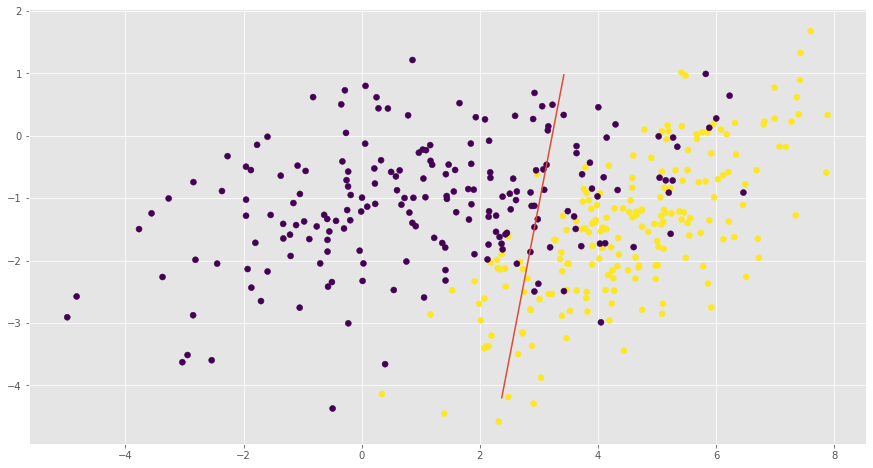

In [129]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

sgd = MySGDClassifier(batch_generator=batch_generator, alpha=0.01, max_epoch=10, model_type='log_reg')
sgd.fit(X, y)
plot_decision_boundary(sgd.weights,X)
plt.scatter(X[:,0], X[:,1], c=y)
print(sgd.errors_log['loss'][-5:])

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [130]:
from sklearn.datasets import make_classification

In [131]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

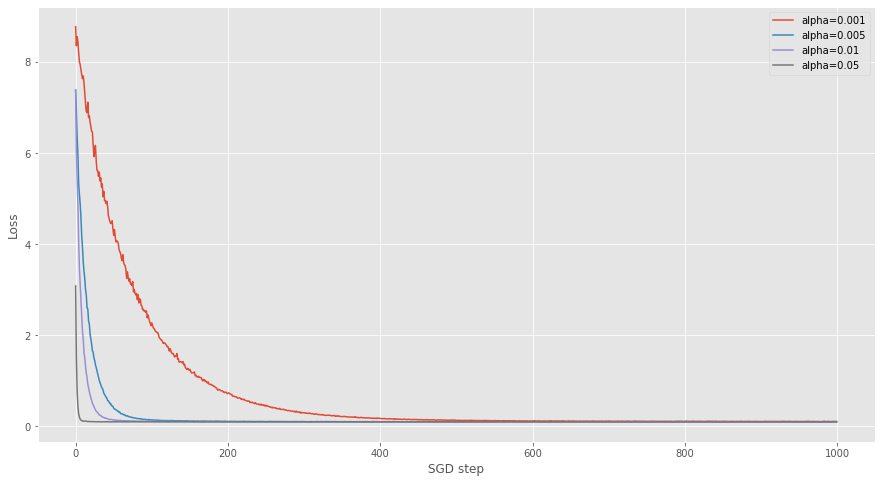

In [132]:
N = 1000
alphas = [0.001, 0.005, 0.01, 0.05]
steps = 25
fig, ax = plt.subplots(figsize=(15, 8))

for alpha in alphas:
    loss = np.zeros(N)
    for s in range(steps):
        clf = MySGDClassifier(batch_generator, alpha=alpha, max_epoch=1,
                              batch_size=(100000 // N), model_type = 'lin_reg')
        clf.fit(X, y)
        loss += np.array(clf.errors_log['loss'])
    ax.plot(np.array(clf.errors_log['iter']), loss/steps, label=f'alpha={alpha}')
    
ax.legend()
ax.set_xlabel('SGD step')
ax.set_ylabel('Loss')
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

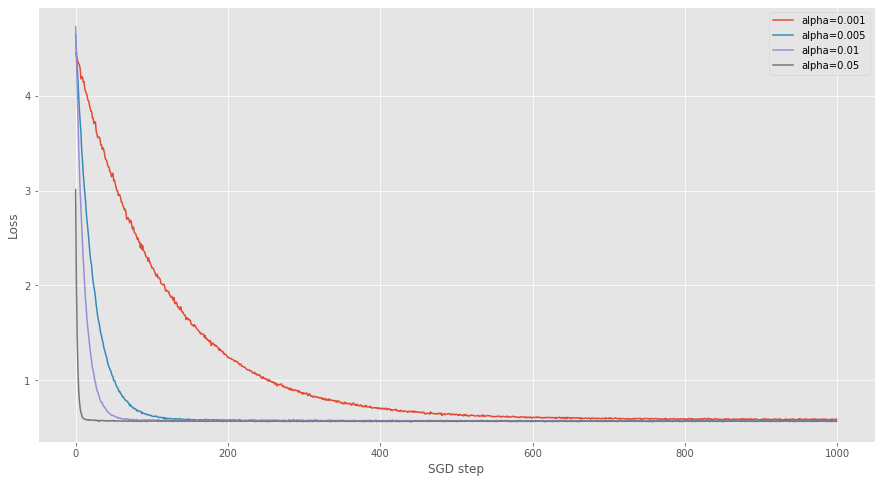

In [135]:
N = 1000
alphas = [0.001, 0.005, 0.01, 0.05]
steps = 25
fig, ax = plt.subplots(figsize=(15, 8))
for alpha in alphas:
    loss = np.zeros(N)
    for s in range(steps):
        clf = MySGDClassifier(batch_generator, alpha=alpha,
                              max_epoch=1, batch_size=(100000 // N), model_type = 'log_reg')
        clf.fit(X, y)
        loss = loss + np.array(clf.errors_log['loss'])
    ax.plot(np.array(clf.errors_log['iter']), loss/steps, label=f'alpha={alpha}')
    
ax.legend()
ax.set_xlabel('SGD step')
ax.set_ylabel('Loss')
plt.show()

Сходимость метода при малых альфа достигается значительно дольше. Однако при больших альфа метод расходится.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

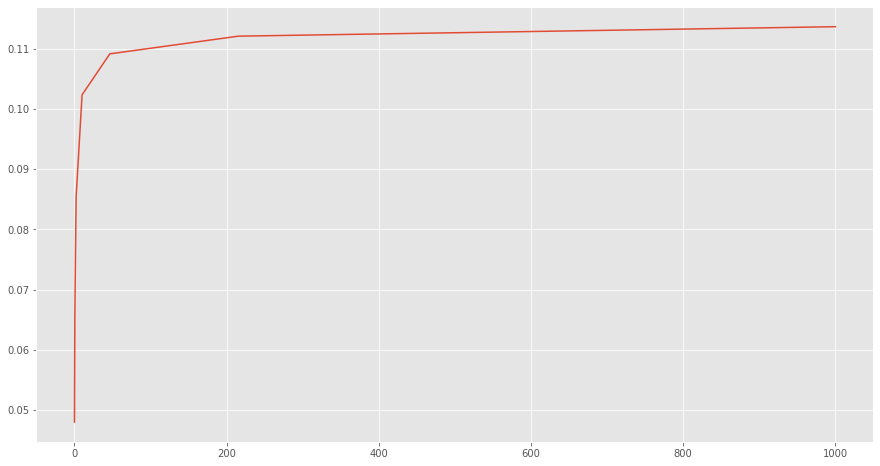

In [136]:
C = np.logspace(3, -3, 10)[:-2]
mean_w = np.zeros(len(C))
for i in range(len(C)):
    clf = MySGDClassifier(batch_generator, batch_size=100, alpha = 0.01, C = C[i])
    clf.fit(X, y)
    mean_w[i] = np.mean(np.abs(clf.weights))
plt.plot(C,mean_w)

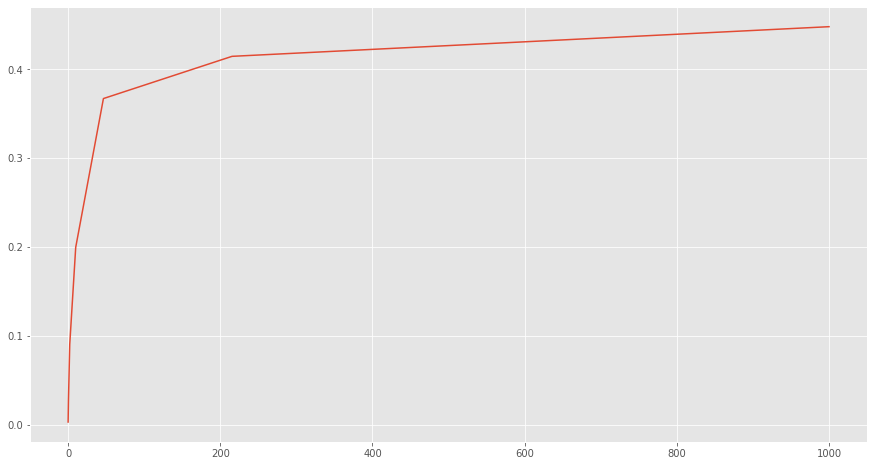

In [137]:
C = np.logspace(3, -3, 10)[:-2]
mean_w = np.zeros(len(C))
for i in range(len(C)):
    clf = MySGDClassifier(batch_generator, batch_size=100,
                          alpha=0.01, C=C[i], model_type='log_reg')
    clf.fit(X, y)
    mean_w[i] = np.mean(np.abs(clf.weights))
plt.plot(C,mean_w)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Что-то не очень, при малых коэффициентах C получаются огромные веса. Я специально не добавил последние коэфициенты в график.

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [138]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [163]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
titles = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
        titles[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))
    titles[doc_group].append(title)

In [199]:
a = np.arange(10)
a[-1:5:-1]

array([9, 8, 7, 6])

In [188]:
np.arange(20).reshape(4,-1)
np.sort(np.arange(20).reshape(4,-1)*-1, axis=1)[::,-15:]

array([[ -4,  -3,  -2,  -1,   0],
       [ -9,  -8,  -7,  -6,  -5],
       [-14, -13, -12, -11, -10],
       [-19, -18, -17, -16, -15]])

In [226]:
group_titles = titles[1]
tfidf_titles=tfidf_vectorizer.fit_transform(group_titles)
m = np.sort(np.array(tfidf_titles.todense()), axis=1)[::,-1:-16:-1]
m[::,-1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19832103, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12782199, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.15486391,
       0.        , 0.        , 0.        , 0.2359337 , 0.        ,
       0.        , 0.        , 0.        , 0.14714189, 0.        ,
       0.        , 0.14040941, 0.        , 0.        , 0.1869936 ,
       0.        , 0.13988416, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [239]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
import pandas as pd
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
y_train = []
X_train = []
groups_train = []

#group_titles = titles[1]
#tfidf_titles = tfidf_vectorizer.fit_transform(group_titles)
#My_X_train = np.sort(tfidf_titles.todense(), axis=1)[::,-1:-15:-1]
My_X_train = np.zeros(15)
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    group_titles = titles[new_group]
    tfidf_titles = tfidf_vectorizer.fit_transform(group_titles)
    tmp = np.sort(tfidf_titles.todense(), axis=1)[::,-1:-16:-1]
    My_X_train = np.vstack((My_X_train, tmp))
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
My_X_train = My_X_train[1:]
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)
X_train

(11690, 15) (11690,) (11690,)


array([[4, 4, 3, ..., 2, 1, 1],
       [8, 7, 7, ..., 2, 2, 2],
       [2, 2, 2, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [6, 2, 1, ..., 1, 1, 1],
       [3, 2, 2, ..., 1, 1, 1]])

In [238]:
np.array(My_X_train)

array([[0.53053714, 0.46859022, 0.42661772, ..., 0.        , 0.        ,
        0.        ],
       [0.39996816, 0.39996816, 0.3671501 , ..., 0.        , 0.        ,
        0.        ],
       [0.38070279, 0.38070279, 0.38070279, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.70710678, 0.70710678, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.60454459, 0.32998108, 0.32998108, ..., 0.        , 0.        ,
        0.        ],
       [0.30523136, 0.30523136, 0.30523136, ..., 0.        , 0.        ,
        0.        ]])

In [240]:
X_train = My_X_train

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [241]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [243]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train

array([[ 1.94179549e-01,  3.03363682e-01,  4.72232171e-01, ...,
        -3.10176462e-01, -2.57333258e-01, -2.20496483e-01],
       [-6.65346500e-01, -2.56998082e-01, -2.29059191e-03, ...,
        -3.10176462e-01, -2.57333258e-01, -2.20496483e-01],
       [-7.92169036e-01, -4.14317428e-01,  1.05853285e-01, ...,
        -3.10176462e-01, -2.57333258e-01, -2.20496483e-01],
       ...,
       [ 1.35652454e+00,  2.25106903e+00, -2.93197016e+00, ...,
        -3.10176462e-01, -2.57333258e-01, -2.20496483e-01],
       [ 6.81365122e-01, -8.28506434e-01, -2.98881297e-01, ...,
        -3.10176462e-01, -2.57333258e-01, -2.20496483e-01],
       [-1.28899191e+00, -1.03061050e+00, -4.96372061e-01, ...,
        -3.10176462e-01, -2.57333258e-01, -2.20496483e-01]])

In [147]:
clf = MySGDClassifier(batch_generator=batch_generator, alpha = 0.0001, batch_size=1000, C = 2)
clf.fit(X_train, y_train)

MySGDClassifier(C=2, alpha=0.0001,
                batch_generator=<function batch_generator at 0x7f4240174ef0>,
                batch_size=1000, max_epoch=1, model_type='lin_reg')

In [150]:
clf.errors_log['loss'][:10]

[64.89104357576916,
 60.992942851941606,
 57.46196556740383,
 54.5405955691891,
 62.403016498962415,
 59.62016413191526,
 60.12135243180642,
 51.38793769170353,
 59.10579358806408,
 59.633921956375595]

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***